### 0. EDA och filhantering (*)
  a) Börja med att ladda ned datasetet Dogs vs Cats från Kaggle. Extrahera den och lägg den i din labfolder, glöm inte att lägga till den till .gitignore

b) Läs in 10 bilder slumpmässigt, plotta dem och extrahera deras labels och skriv ut i titeln.

In [7]:
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from random import sample
import os
import numpy as np
import shutil
import random 
from PIL import Image
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

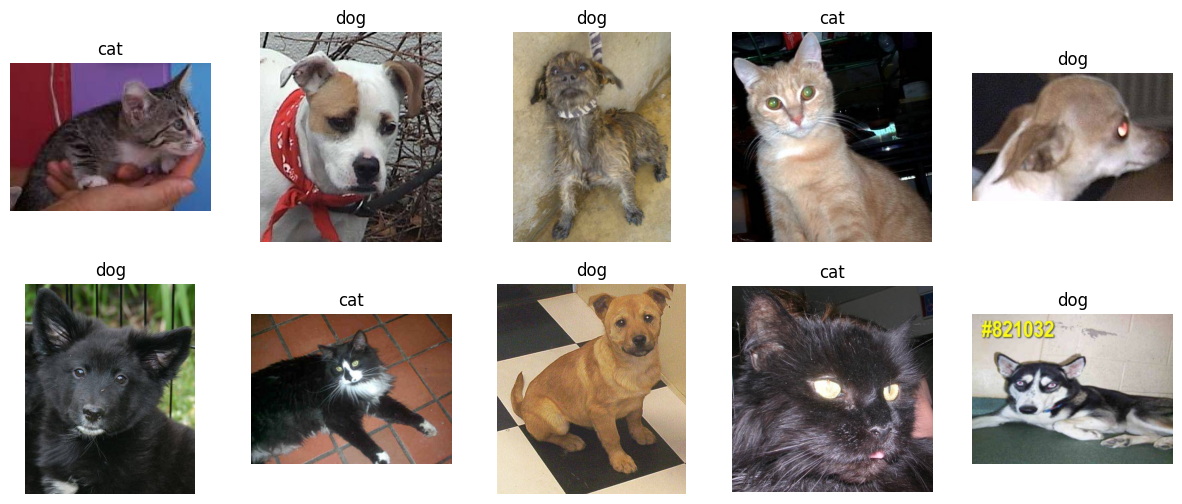

In [8]:
image_folder_path = "original_data/train"

# Create list with all images
all_images = [os.path.join(image_folder_path, f) for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

# Pick 10 random pictures from the list
random_images = sample(all_images, 10)

def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_images(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Load images
images = [load_image(image_path) for image_path in random_images]
labels = [os.path.basename(image_path).split('.')[0] for image_path in random_images]

plot_images(images, labels)

c) Skapa folderstrukturen nedan med Python:

In [8]:
paths = [
    'experiment_small_data/test',
    'experiment_small_data/train',
    'experiment_small_data/val',
    'experiment_tiny_data/test',
    'experiment_tiny_data/train',
    'experiment_tiny_data/val',
    'original_data'
]

# Create folders
for path in paths:
    Path(path).mkdir(parents=True, exist_ok=True)

d) Nu ska du göra train|val|test split med följande splits:
- train - 1600 (800 dogs, 800 cats)
- val - 400 (200 dogs, 200 cats)
- test - 500 (250 dogs, 250 cats)

In [9]:
original_data = 'original_data/train'  
experiment_small_data = 'experiment_small_data' 

In [10]:
def copy_files(files, subdir):
    for file in files:
        # Copy files from 'source_dir' to 'target_dir'
        shutil.copy(file, os.path.join(experiment_small_data, subdir, os.path.basename(file)))

# Read files and shuffle
dog_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('dog')]
cat_files = [os.path.join(original_data, file) for file in os.listdir(original_data) if file.startswith('cat')]
np.random.shuffle(dog_files)
np.random.shuffle(cat_files)

train_dogs, val_dogs, test_dogs = 800, 200, 250
train_cats, val_cats, test_cats = 800, 200, 250

# Sampling without replacement for dogs 
dogs_train = dog_files[:train_dogs]
dogs_val = dog_files[train_dogs:train_dogs+val_dogs]
dogs_test = dog_files[train_dogs+val_dogs:train_dogs+val_dogs+test_dogs]

copy_files(dogs_train, 'train')
copy_files(dogs_val, 'val')
copy_files(dogs_test, 'test')

# Sampling without replacement for cats
cats_train = cat_files[:train_cats]
cats_val = cat_files[train_cats:train_cats+val_cats]
cats_test = cat_files[train_cats+val_cats:train_cats+val_cats+test_cats]

copy_files(cats_train, 'train')
copy_files(cats_val, 'val')
copy_files(cats_test, 'test')

print('Files have been copied successfully')

Files have been copied successfully


e) Läs in dataseten från experiment_small, experiment_tiny (BONUS) och plocka ut labelsvektorer, som
ska vara one-hot encoded med 0 och 1

In [11]:
def get_image_filenames(directory):
    # Returns list with filenames that ends with '.jpg'  
    filenames = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    random.shuffle(filenames)  # Shuffle the list
    return filenames

# Create lists with filenames
train_list = get_image_filenames(os.path.join(experiment_small_data, 'train'))
test_list = get_image_filenames(os.path.join(experiment_small_data, 'test'))
val_list = get_image_filenames(os.path.join(experiment_small_data, 'val'))

# Print number of files in each dataset 
print(f"Train files: {len(train_list)}")
print(f"Test files: {len(test_list)}")
print(f"Val files: {len(val_list)}")


Train files: 1600
Test files: 500
Val files: 400


In [12]:
def load_images(directory, filenames):
    # Load images and return list with numpy arrays 
    images = [np.array(Image.open(os.path.join(directory, filename))) for filename in filenames]
    return images

X_train = load_images(os.path.join(experiment_small_data, 'train'), train_list)
X_test = load_images(os.path.join(experiment_small_data, 'test'), test_list)
X_val = load_images(os.path.join(experiment_small_data, 'val'), val_list)

print(f"Train images: {len(X_train)}")
print(f"Test images: {len(X_test)}")
print(f"Val images: {len(X_val)}")


Train images: 1600
Test images: 500
Val images: 400


In [13]:
X_train

[array([[[ 29,  26,  17],
         [ 28,  25,  16],
         [ 26,  23,  14],
         ...,
         [  1,   1,   0],
         [  1,   1,   0],
         [  2,   2,   0]],
 
        [[ 31,  28,  19],
         [ 30,  27,  18],
         [ 28,  25,  16],
         ...,
         [  1,   1,   0],
         [  1,   1,   0],
         [  2,   2,   0]],
 
        [[ 33,  30,  21],
         [ 32,  29,  20],
         [ 30,  27,  18],
         ...,
         [  1,   1,   0],
         [  1,   1,   0],
         [  2,   2,   0]],
 
        ...,
 
        [[230, 230, 228],
         [231, 231, 229],
         [231, 231, 229],
         ...,
         [ 74,  60,  49],
         [ 73,  59,  48],
         [ 72,  58,  47]],
 
        [[229, 229, 227],
         [229, 229, 227],
         [230, 230, 228],
         ...,
         [ 76,  62,  51],
         [ 74,  60,  49],
         [ 73,  59,  48]],
 
        [[227, 227, 225],
         [228, 228, 226],
         [229, 229, 227],
         ...,
         [ 75,  61,  50],
  

In [14]:
X_train[2].shape

(389, 500, 3)

In [15]:
# Extract labels from filenames
def extract_labels(filename):
    if 'cat' in filename:
        return 0
    else:
        return 1

y_train = [extract_labels(filename) for filename in train_list]
y_val = [extract_labels(filename) for filename in val_list]
y_test = [extract_labels(filename) for filename in test_list]

In [16]:
y_train

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


- plotta några bilder med deras respektive labels och kontrollera att det är korrekt.

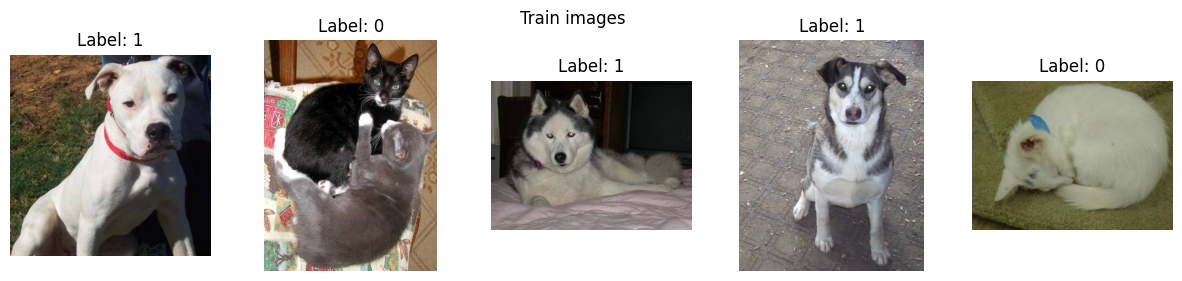

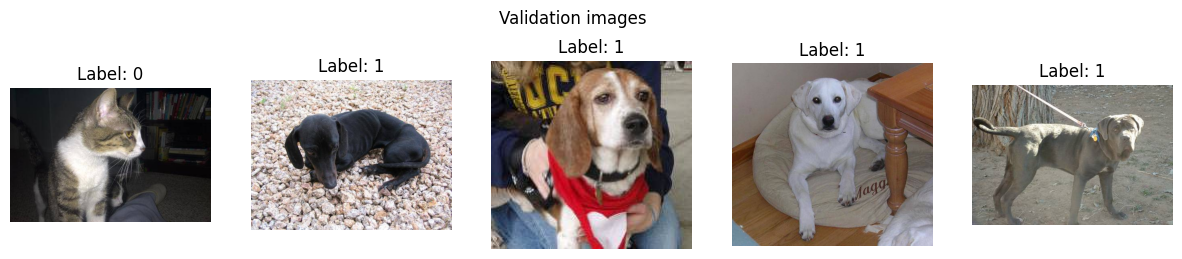

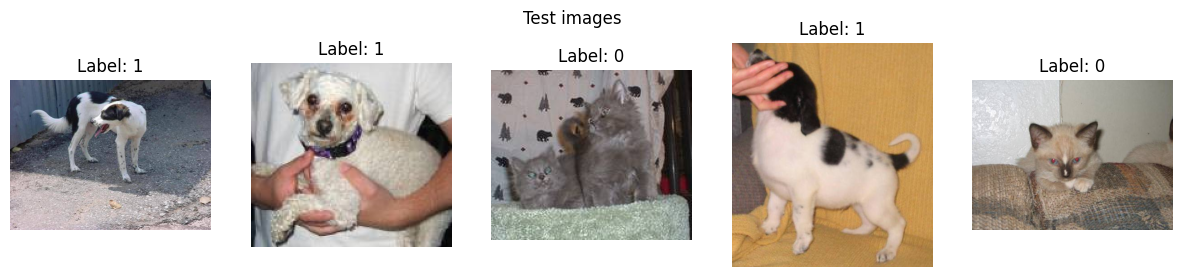

In [17]:
def plot_images_with_labels(images, labels, title, num_images=5):
    # Choose 6 random images and labels   
    indices = np.random.choice(range(len(images)), num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(images[index])
        ax.set_title(f"Label: {labels[index]}")
        ax.axis('off')  
    plt.suptitle(title)
    plt.show()

plot_images_with_labels(X_train, y_train, 'Train images')
plot_images_with_labels(X_val, y_val, 'Validation images')
plot_images_with_labels(X_test, y_test, 'Test images')

- skapa lämplig plot för att kontrollera att dataseten är balanserade

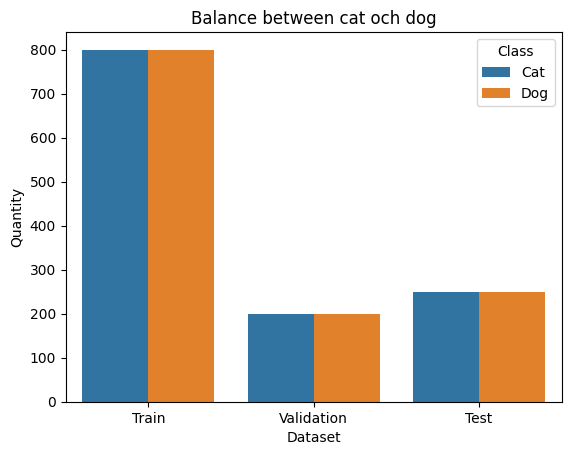

In [18]:
# Function to count all labels
def count_labels(labels):
    cat_count = sum(label == 0 for label in labels)
    dog_count = sum(label == 1 for label in labels)
    return cat_count, dog_count

# Count number of cat and dog in each dataset
train_cat_count, train_dog_count = count_labels(y_train)
val_cat_count, val_dog_count = count_labels(y_val)
test_cat_count, test_dog_count = count_labels(y_test)

data = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'Cat': [train_cat_count, val_cat_count, test_cat_count],
    'Dog': [train_dog_count, val_dog_count, test_dog_count]
}

df = pd.DataFrame(data)

# Transform DataFrame to long format for Seaborn
df_long = df.melt(id_vars='Dataset', var_name='Class', value_name='Count')

sns.barplot(data=df_long, x='Dataset', y='Count', hue='Class')
plt.xlabel('Dataset')
plt.ylabel('Quantity')
plt.title('Balance between cat och dog')
plt.show()

- skapa lämplig plot för att kontrollera att dataseten är slumpade, dvs inte ex

In [19]:
# Create a list with index for each dataset
train_index = list(range(len(y_train)))
val_index = list(range(len(y_train), len(y_train) + len(y_val)))
test_index = list(range(len(y_train) + len(y_val), len(y_train) + len(y_val) + len(y_test)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train, mode='markers', name='Train'))
fig.add_trace(go.Scatter(x=val_index, y=y_val, mode='markers', name='Validation'))
fig.add_trace(go.Scatter(x=test_index, y=y_test, mode='markers', name='Test'))

fig.update_layout(title='Shuffled dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                    tickvals=[0, 1],
                    ticktext=['Cat', 'Dog']
                  ))

fig.show()

### 1. Bildbehandling (*)
Uppgifterna nedan ska upprepas för respektive experimentdataset om du också väljer att arbeta med
tinydatasetet.
- a) Skapa en plot för att visualisera bildstorlekarna i träningsdatan. Använd seaborns jointplot.

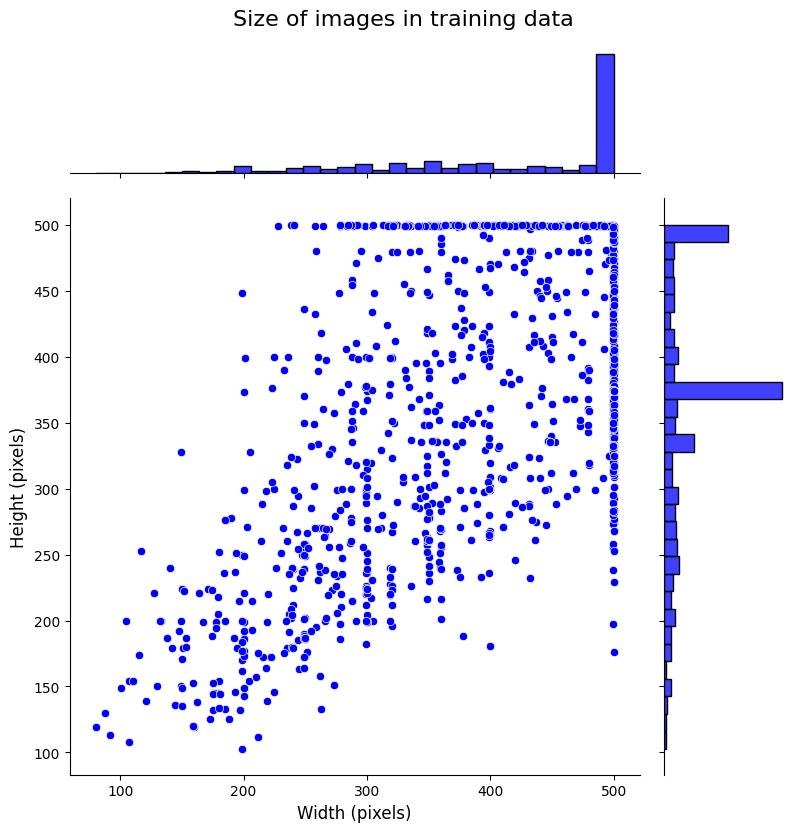

In [29]:
def get_image_sizes(directory, filenames):
    sizes = []
    for filename in filenames:
        with Image.open(os.path.join(directory, filename)) as img:
            sizes.append(img.size)  # img.size returns tuple of (width, height)
    return sizes

# Get imagesize for all images in 'experiment_small_data/train'
train_sizes = get_image_sizes(os.path.join(experiment_small_data, 'train'), train_list)

# Filter out images with width < 80 and height < 100
filtered_train_sizes = [size for size in train_sizes if size[0] >= 80 and size[1] >= 100]

# Create dataframe
sizes_df = pd.DataFrame(filtered_train_sizes, columns=['Width', 'Height'])

# Create jointplot
jp = sns.jointplot(data=sizes_df, x='Width', y='Height', kind='scatter', color='b', marginal_kws=dict(bins=30, fill=True), height=8, ratio=4)

jp.fig.suptitle('Size of images in training data', fontsize=16, y=1.03)  
jp.set_axis_labels('Width (pixels)', 'Height (pixels)', fontsize=12)

plt.show()


 b) Välj en lämplig bildstorlek att ändra samtliga bilder till. Gör en analys och fundera på om du behöver
slänga bilder. Hur kommer du fram till ditt val?
<br>
<br>
Enligt plotten över bildernas storlek så verkar de vanligaste bredd och höjddimensionerna ligga i det övre området i grafen. Eftersom att jag vill minimera beskärning och skalnings samtidigt behålla så mycket information som möjligt så väljer en storlek nära medianen. Jag väljer bildstorleken 256x256 för att minska antalet mycket stora eller mycket små bilder vilket är bra då detta kan påverka träningens prestanda och effektivitet. 

c) Gör resize sådant att samtliga bilder är samma storlek och spara dem i numpy arrays med följande
struktur:
- (samples, row, cols, color_channels) 

In [21]:
def resize_images(directory, filenames, size=(256, 256)):
    image_data = np.zeros((len(filenames), size[0], size[1], 3))
    for i, filename in enumerate(filenames):
        with Image.open(os.path.join(directory, filename)) as img:
            img = img.resize(size, Image.Resampling.LANCZOS)
            img_array = np.array(img)
            if img_array.shape[-1] == 4:  # Check if the image has an alpha channel
                img_array = img_array[..., :3]  # Remove alpha channel
            image_data[i] = img_array  # Assign the processed image to image_data at index i
    return image_data

X_train = resize_images('experiment_small_data/train', train_list)
X_val = resize_images('experiment_small_data/val', val_list)
X_test = resize_images('experiment_small_data/test', test_list)


In [26]:
X_train.shape

(1600, 256, 256, 3)

In [27]:
X_train[3].shape

(256, 256, 3)